# Notebook Contents

- [Imports](#Imports)
- [Data](#Data)
- [Pitcher Overview](#Pitcher-Overview)
    - [Pitch Usage](#Pitch-Usage)
    - [Pitch Usage by Batter Handedness](#Pitch-Usage-by-Batter-Handedness)
    - [Velocity by Pitch Type](#Velocity-by-Pitch-Type)
- [Pitcher Stuff](#Pitcher-Stuff)
    - [Spin Axis](#Spin-Axis)
    - [Velocity & Spin Rate](#Velocity-&-Spin-Rate)
    - [HB & VB Axis](#Horizontal-&-Vertical-Break-Axis)
    - [Release Position](#Release-Postion)
- [Count Breakdown](#Count-Breakdown)
    - [Pitch Usage by Count](#Pitch-Usage-by-Count)
- [Pitch Locations](#Pitch-Locations)
    - [Balls &Strikes from Hitters' Perspective - All Pitches](#Balls-&-Strikes-from-Hitters'-Perspective--All-Pitches)
    - [Pitch Location by Pitch Type](#Pitch-Location-by-Pitch-Type)
- [Heatmaps](#Heatmaps)
    - [4-Seam Heatmaps](#4-Seam-Heatmaps)
    - [Slider Heatmaps](#Slider-Heatmaps)
    - [Changeup Heatmaps](#Changeup-Heatmaps)
    - [Curveball Heatmaps](#Curveball-Heatmaps)
    - [Cutter Heatmaps](#Cutter-Heatmaps)

# Imports

In [1]:
from math import radians
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
scherzer = pd.read_csv('../data/max-scherzer.csv')
scherzer.drop(columns = ['Unnamed: 0'], inplace = True)

# Font Dictionary
font_title = {
    'size': 14,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(scherzer.shape)
scherzer.head(2)

(2821, 90)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,pitch_count,plate_-x,pfx_-x,bauer_units,swing_miss
0,FF,2021-09-29,94.3,-3.23,5.43,"Scherzer, Max",571976,453286,triple,hit_into_play,1,Wil Myers triples (2) on a line drive to left ...,R,R,R,LAD,SD,X,8.0,line_drive,0,2,2021,-1.22,17.28,-0.37,3.24,NaN,NaN,605170.0,1,6,Top,96.1,49.21,669257,10.132657,-136.967197,-3.168637,-17.601606,30.075797,-13.539700,3.49,1.6,376.0,98.8,23.0,94.2,2486.0,6.3,632297,453286,669257,571970,607208,621035,608369,572041,666158,605141,54.20,0.446,0.612,1.6,1.0,1.0,2.0,5.0,50,3,4-Seam Fastball,5,5,5,5,6,5,6,5,Infield shift,Standard,230.0,-0.224,1.555,1,0-2,0.37,14.64,26.362672,0
1,SL,2021-09-29,84.8,-3.51,5.33,"Scherzer, Max",571976,453286,NaN,swinging_strike,4,Wil Myers triples (2) on a line drive to left ...,R,R,R,LAD,SD,S,NaN,NaN,0,1,2021,-0.03,6.24,-0.72,2.62,NaN,NaN,605170.0,1,6,Top,NaN,NaN,669257,6.597895,-123.444921,-1.129416,-1.452731,20.644158,-26.818383,3.49,1.6,NaN,NaN,NaN,85.4,2439.0,6.3,632297,453286,669257,571970,607208,621035,608369,572041,666158,605141,54.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,2,Slider,5,5,5,5,5,5,5,5,Infield shift,Standard,183.0,0.000,-0.064,1,0-1,0.72,0.36,28.761792,1


In [3]:
scherzer.groupby('pitch_type').mean()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,plate_-x,pfx_-x,bauer_units,swing_miss
pitch_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CH,84.980048,-3.292233,5.437577,594259.672209,453286.0,10.351544,4.803571,0.961995,1.325416,2021.0,-1.263017,3.952019,-0.384703,1.732684,619457.391304,589633.973684,582597.150000,0.976247,3.940618,136.780759,123.845190,573730.287411,9.350939,-123.433101,-3.045532,-14.708874,22.979697,-28.381499,3.405463,1.579240,123.238806,80.705224,6.082090,85.280048,1446.159145,6.435629,633340.691211,453286.0,573730.287411,562368.465558,561011.522565,510095.874109,601673.574822,604699.767221,645552.855107,643498.760095,54.062447,0.242846,0.259205,0.193388,1.000000,0.132231,0.057851,2.974359,29.099762,3.463183,1.391924,1.947743,0.890736,2.448931,1.950119,1.399050,0.900238,2.448931,248.543943,-0.000200,-0.007157,0.577197,0.384703,15.156200,17.014666,0.133017
CU,76.863538,-3.232708,5.609061,590352.050542,453286.0,9.415162,4.854167,0.516245,0.703971,2021.0,1.120650,-7.939495,-0.285018,1.982455,595749.125000,617107.515152,583887.618182,1.003610,3.758123,134.276563,118.992500,579615.866426,4.226670,-111.858096,0.513459,8.586515,20.618850,-38.026231,3.366354,1.564188,141.142857,78.726786,12.517857,76.538267,2660.692029,6.296739,633294.050542,453286.0,579615.866426,563144.256318,568864.093863,504816.444043,602209.617329,609039.830325,645646.631769,639009.844765,54.203718,0.355250,0.387219,0.316667,1.000000,0.235294,0.117647,3.125000,27.440433,2.314079,1.382671,1.981949,0.916968,2.447653,1.985560,1.386282,0.924188,2.447653,60.666667,0.000588,-0.003267,0.613718,0.285018,-13.447798,34.622552,0.108303
FC,90.224219,-3.338398,5.400547,591318.769531,453286.0,9.238281,4.731343,1.039062,1.054688,2021.0,-0.085117,8.931094,0.560312,2.427109,614244.200000,606401.730769,579514.880597,0.886719,3.832031,155.429512,106.320732,570014.429688,9.853035,-131.100885,-3.047970,-2.909502,25.455077,-23.102448,3.406563,1.568789,160.783019,84.960194,16.524272,90.299219,2474.929688,6.232422,633404.972656,453286.0,570014.429688,562345.769531,556658.269531,510484.261719,603572.531250,611783.992188,646727.863281,644919.402344,54.266367,0.454390,0.555171,0.329221,1.000000,0.155844,0.233766,3.731707,27.316406,3.234375,1.171875,1.738281,0.820312,2.089844,1.757812,1.183594,0.851562,2.089844,213.691406,-0.000508,0.000980,0.687500,-0.560312,1.021406,27.432468,0.160156
FF,94.298480,-3.220585,5.560691,593492.857143,453286.0,8.023556,5.030651,0.882219,0.849544,2021.0,-0.884065,16.034134,-0.010312,2.643868,617752.835294,594873.238994,578701.358543,0.991641,3.511398,129.241006,112.117877,567459.774316,10.268114,-136.904039,-4.830701,-13.335328,29.560594,-14.444345,3.413997,1.582249,199.460465,81.804673,31.771028,94.067705,2435.912614,6.231003,633428.022796,453286.0,567459.774316,562601.871581,556748.787234,509256.297112,602333.936170,611220.569909,645570.477204,645175.316109,54.270068,0.305620,0.369698,0.279333,0.993333,0.136667,0.150000,3.418994,25.486322,2.863222,1.127660,1.810790,0.746960,2.191489,1.820669,1.137538,0.766717,2.191489,223.089666,-0.000131,-0.013736,0.684650,0.010312,10.608784,25.836233,0.134498
SL,85.896915,-3.332087,5.452777,592657.264973,453286.0,10.275862,4.058394,0.745917,1.027223,2021.0,0.242940,4.634483,0.506679,1.692377,62

In [4]:
scherzer.pitch_type.value_counts(normalize=True)

FF    0.466501
SL    0.195321
CH    0.149238
CU    0.098192
FC    0.090748
Name: pitch_type, dtype: float64

In [5]:
r_scherzer = scherzer.loc[(scherzer['player_name'] == 'Scherzer, Max') & (scherzer['stand'] == 'R')].copy()
l_scherzer = scherzer.loc[(scherzer['player_name'] == 'Scherzer, Max') & (scherzer['stand'] == 'L')].copy()

ff = scherzer.loc[scherzer['pitch_type'] == 'FF']
sl = scherzer.loc[scherzer['pitch_type'] == 'SL']
ch = scherzer.loc[scherzer['pitch_type'] == 'CH']
cu = scherzer.loc[scherzer['pitch_type'] == 'CU']
fc = scherzer.loc[scherzer['pitch_type'] == 'FC']

r_ff = r_scherzer.loc[r_scherzer['pitch_type'] == 'FF']
r_sl = r_scherzer.loc[r_scherzer['pitch_type'] == 'SL']
r_ch = r_scherzer.loc[r_scherzer['pitch_type'] == 'CH']
r_cu = r_scherzer.loc[r_scherzer['pitch_type'] == 'CU']
r_fc = r_scherzer.loc[r_scherzer['pitch_type'] == 'FC']

l_ff = l_scherzer.loc[l_scherzer['pitch_type'] == 'FF']
l_sl = l_scherzer.loc[l_scherzer['pitch_type'] == 'SL']
l_ch = l_scherzer.loc[l_scherzer['pitch_type'] == 'CH']
l_cu = l_scherzer.loc[l_scherzer['pitch_type'] == 'CU']
l_fc = l_scherzer.loc[l_scherzer['pitch_type'] == 'FC']

order = ['FF', 'SL', 'CH', 'CU', 'FC']

# Pitcher Overview

### Pitch Usage

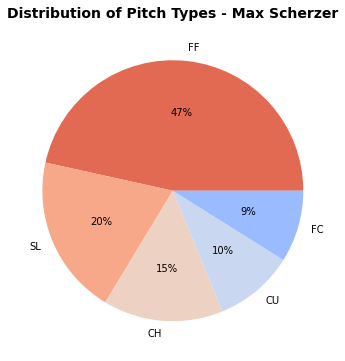

In [6]:
plt.figure(figsize = (8, 6))

dist = round(scherzer.pitch_type.value_counts(normalize = True), 2)
color = sns.color_palette('coolwarm_r')

plt.pie(dist, labels = order, colors = color, autopct = '%.0f%%')
plt.title('Distribution of Pitch Types - Max Scherzer', fontdict = font_title, pad = 15);

### Pitch Usage by Batter Handedness

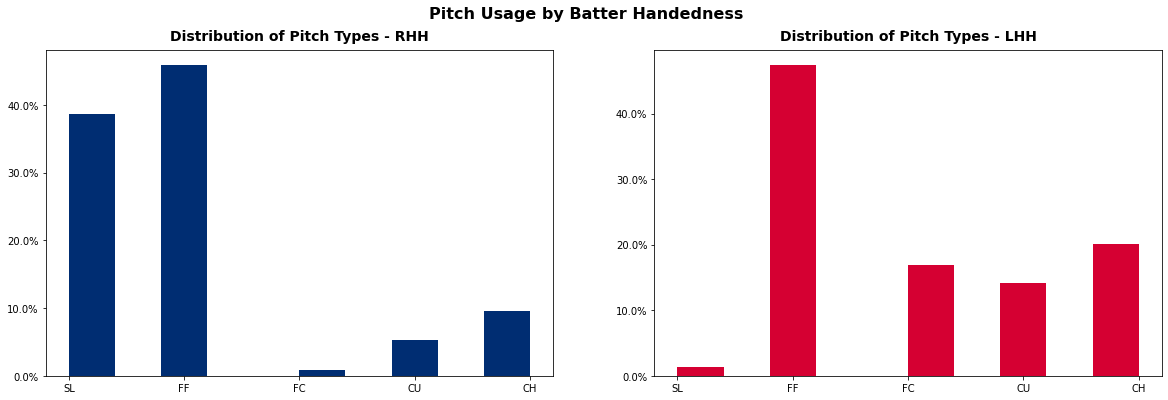

In [7]:
blue = '#002D72'
red = '#D50032'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Batter Handedness', fontsize = 16, fontweight = 'bold')

dist_r = r_scherzer.pitch_type.sort_values(ascending = False)
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = blue)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHH', fontdict = font_title, pad = 15)

dist_l = l_scherzer.pitch_type.sort_values(ascending = False)
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = red)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHH', fontdict = font_title, pad = 15);

### Velocity by Pitch Type

4-Seam velo sits: 94 - 95 mph,  max: 98.0 mph
Slider velo sits: 85 - 87 mph,  max: 90.0 mph
Changeup velo sits: 84 - 86 mph,  max: 89.0 mph
Curve velo sits: 76 - 78 mph,  max: 80.6 mph
Cutter velo sits: 90 - 91 mph,  max: 93.4 mph


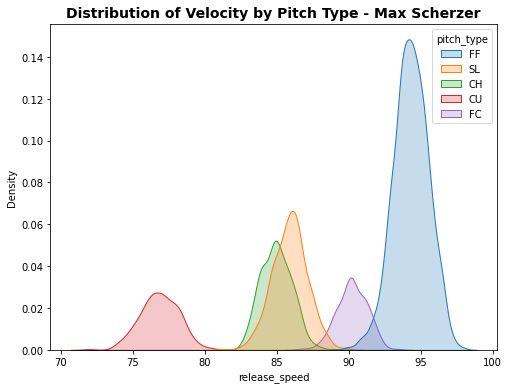

In [8]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = scherzer, x = 'release_speed', shade = 'fill', hue = 'pitch_type',
            hue_order = order, palette = 'tab10')
plt.title('Distribution of Velocity by Pitch Type - Max Scherzer', fontdict = font_title, pad = 12);
print('4-Seam velo sits:',round(ff['release_speed'].quantile(.25)),'-',round(ff['release_speed'].quantile(.75)), 
      'mph, ','max:',round(ff['release_speed'].max(),2),'mph')
print('Slider velo sits:',round(sl['release_speed'].quantile(.25)),'-',round(sl['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(sl['release_speed'].max(), 2), 'mph')
print('Changeup velo sits:',round(ch['release_speed'].quantile(.25)),'-',round(ch['release_speed'].quantile(.75)),
      'mph, ','max:',round(ch['release_speed'].max(), 2),'mph')
print('Curve velo sits:',round(cu['release_speed'].quantile(.25)),'-',round(cu['release_speed'].quantile(.75)), 
      'mph, ','max:',round(cu['release_speed'].max(), 2),'mph')
print('Cutter velo sits:',round(fc['release_speed'].quantile(.25)),'-',round(fc['release_speed'].quantile(.75)),
      'mph, ','max:',round(fc['release_speed'].max(), 2),'mph')

### Pitch Velocity by Pitch Number

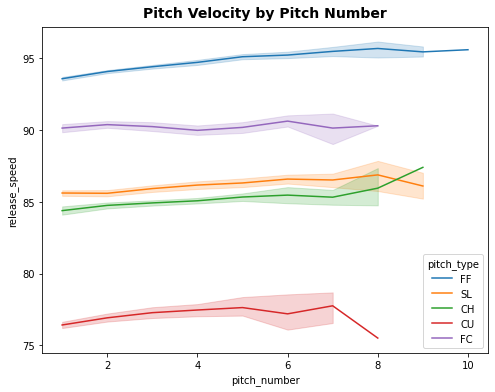

In [9]:
plt.figure(figsize = (8, 6))

sns.lineplot(data = scherzer, x = 'pitch_number', y = 'release_speed', hue = 'pitch_type',
             hue_order = order, palette = 'tab10')
plt.title('Pitch Velocity by Pitch Number', fontdict = font_title, pad = 15);

# Pitcher Stuff

### Spin Axis

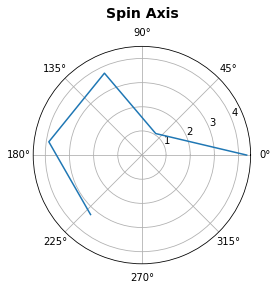

In [10]:
spin_axis = scherzer.groupby(['pitch_type']).mean()
ax = plt.subplot(polar = True)
ax.plot([radians(x) for x in spin_axis['spin_axis'].values])
ax.set_title('Spin Axis', fontdict = font_title, pad = 15);

### Spin Rate by Pitch Type

4-Seam spin rate: 2374 - 2498 rpm, max: 3590.0 rpm
Slider spin rate: 2191 - 2364 rpm, max: 2890.0 rpm
Changeup spin rate: 1360 - 1523 rpm, max: 1852.0 rpm
Curve spin rate: 2562 - 2745 rpm, max: 3075.0 rpm
Cutter spin rate: 2407 - 2550 rpm, max: 2786.0 rpm


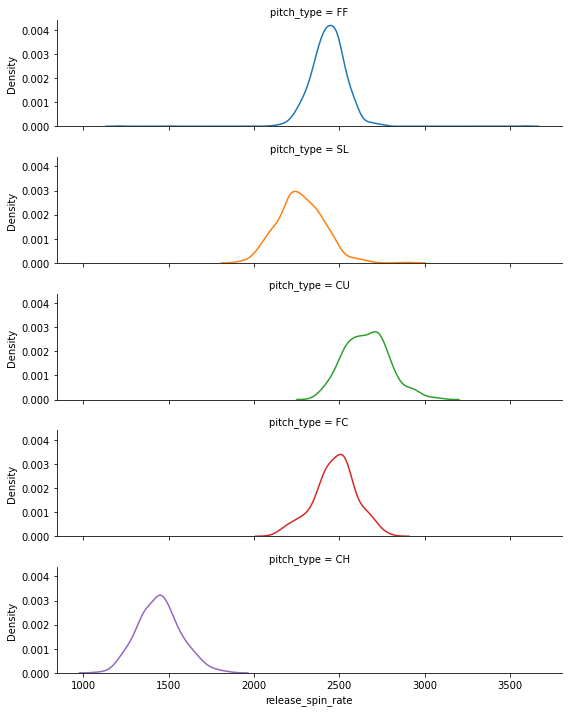

In [11]:
g = sns.FacetGrid(scherzer, row = 'pitch_type', hue = 'pitch_type', height = 2, aspect = 4, );
g.map(sns.kdeplot, 'release_spin_rate', palette = 'tab10')
print('4-Seam spin rate:',round(ff['release_spin_rate'].quantile(.25)),
      '-',round(ff['release_spin_rate'].quantile(.75)),'rpm,','max:',round(ff['release_spin_rate'].max(),2),'rpm')
print('Slider spin rate:',round(sl['release_spin_rate'].quantile(.25)),'-',
      round(sl['release_spin_rate'].quantile(.75)),'rpm,','max:', round(sl['release_spin_rate'].max(), 2), 'rpm')
print('Changeup spin rate:',round(ch['release_spin_rate'].quantile(.25)),'-',
      round(ch['release_spin_rate'].quantile(.75)),'rpm,','max:',round(ch['release_spin_rate'].max(), 2),'rpm')
print('Curve spin rate:',round(cu['release_spin_rate'].quantile(.25)),'-',
      round(cu['release_spin_rate'].quantile(.75)), 'rpm,','max:',round(cu['release_spin_rate'].max(), 2),'rpm')
print('Cutter spin rate:',round(fc['release_spin_rate'].quantile(.25)),'-',
      round(fc['release_spin_rate'].quantile(.75)),'rpm,','max:',round(fc['release_spin_rate'].max(), 2),'rpm');

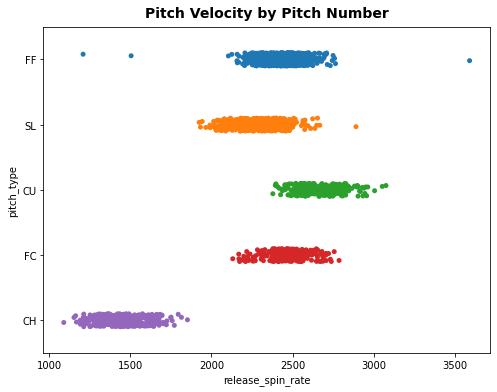

In [12]:
plt.figure(figsize = (8, 6))
sns.stripplot(data = scherzer, x = 'release_spin_rate', y = 'pitch_type')
plt.title('Pitch Velocity by Pitch Number', fontdict = font_title, pad = 15);

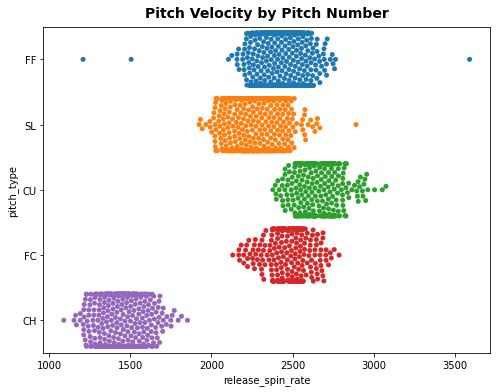

In [13]:
plt.figure(figsize = (8, 6))
sns.swarmplot(data = scherzer, x = 'release_spin_rate', y = 'pitch_type')
plt.title('Pitch Velocity by Pitch Number', fontdict = font_title, pad = 15);

### Horizontal & Vertical Break Axis

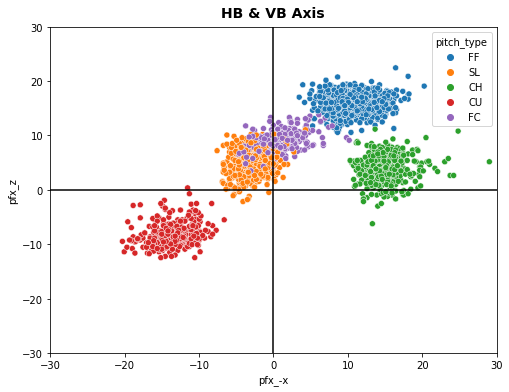

In [14]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = scherzer, x = 'pfx_-x', y = 'pfx_z', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.xlim(-30, 30), plt.ylim(-30, 30)
plt.axhline(0, color = 'black'), plt.axvline(0, color = 'black')
plt.title('HB & VB Axis', fontdict = font_title, pad = 15);

### Velocity & Spin Rate

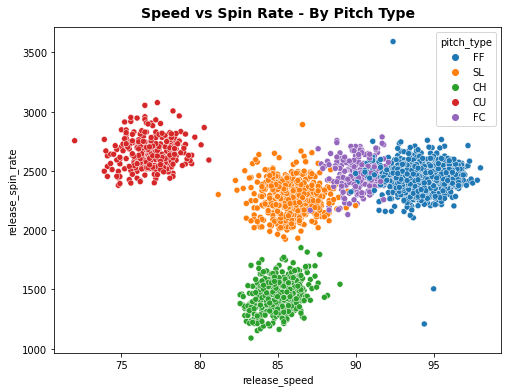

In [15]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = scherzer, x = 'release_speed', y = 'release_spin_rate', hue = 'pitch_type', 
                hue_order = order, palette = 'tab10')
plt.title('Speed vs Spin Rate - By Pitch Type', fontdict = font_title, pad = 15);

### Release Postion

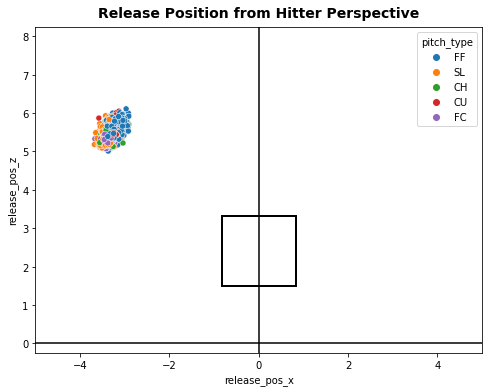

In [16]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = scherzer, x = 'release_pos_x', y = 'release_pos_z', hue = 'pitch_type', 
                 hue_order = order, palette = 'tab10')
plt.xlim(-5, 5), plt.ylim(-0.25, 8.25)
plt.axvline(0, color = 'black'), plt.axhline(0, color = 'black')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.title('Release Position from Hitter Perspective', fontdict = font_title, pad = 15);

### Bauer Units

4-Seam Avg Bauer Units: 25.84
Slider Avg Bauer Units: 26.47
Changeup Avg Bauer Units: 17.01
Curveball Avg Bauer Units: 34.62
Cutter Avg Bauer Units: 27.43


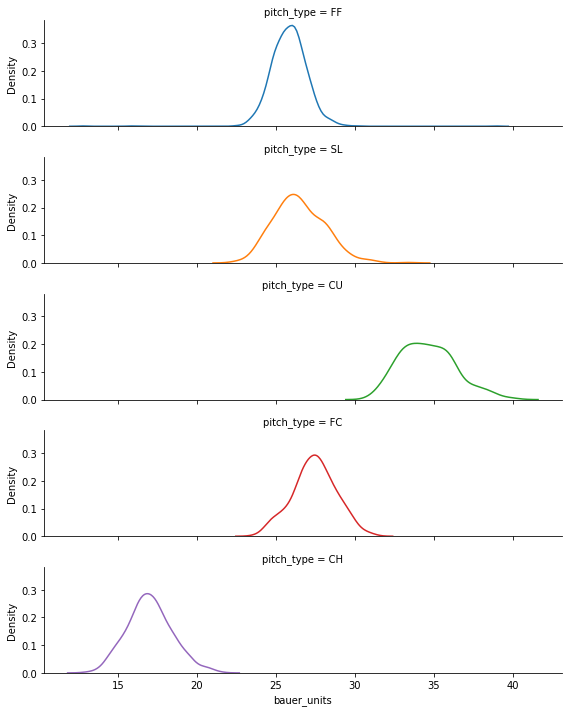

In [17]:
g = sns.FacetGrid(scherzer, row = 'pitch_type', hue = 'pitch_type', height = 2, aspect = 4, )
g.map(sns.kdeplot, 'bauer_units', palette = 'tab10')
print('4-Seam Avg Bauer Units:', round(ff['bauer_units'].mean(), 2))
print('Slider Avg Bauer Units:', round(sl['bauer_units'].mean(), 2))
print('Changeup Avg Bauer Units:', round(ch['bauer_units'].mean(), 2))
print('Curveball Avg Bauer Units:', round(cu['bauer_units'].mean(), 2))
print('Cutter Avg Bauer Units:', round(fc['bauer_units'].mean(), 2));

# Count Breakdown

### Pitch Usage by Count

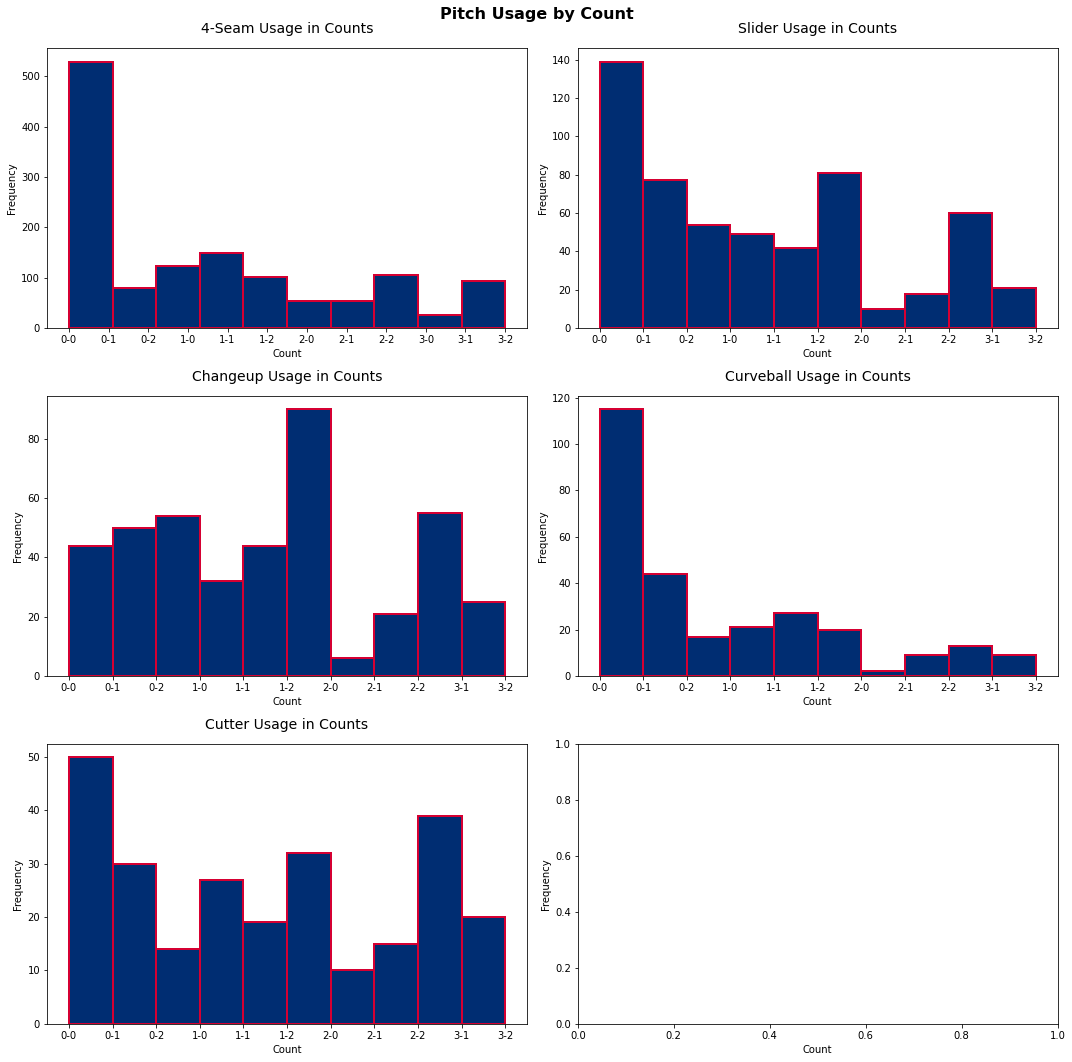

In [18]:
fig, axs = plt.subplots(3, 2, figsize = (15, 15))
fig.suptitle('Pitch Usage by Count', fontsize = 16, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count')
plt.setp(axs[:, 0:], ylabel = 'Frequency')
axs[0][0].hist(ff['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][0].set_title('4-Seam Usage in Counts', fontsize = 14, pad = 15)
axs[0][1].hist(sl['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][1].set_title('Slider Usage in Counts', fontsize = 14, pad = 15)
axs[1][0].hist(ch['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][0].set_title('Changeup Usage in Counts', fontsize = 14, pad = 15)
axs[1][1].hist(cu['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][1].set_title('Curveball Usage in Counts', fontsize = 14, pad = 15)
axs[2][0].hist(fc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][0].set_title('Cutter Usage in Counts', fontsize = 14, pad = 15)
plt.tight_layout();

# Pitch-Locations

### Balls & Strikes from Hitters' Perspective - All Pitches

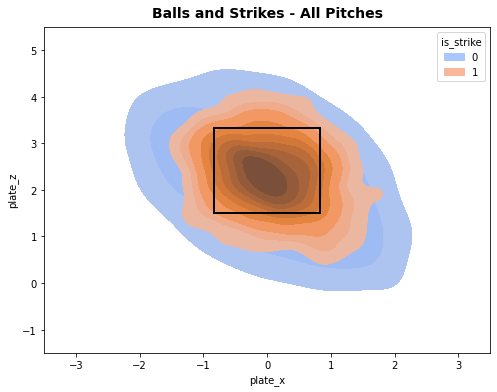

In [19]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = scherzer, x = 'plate_x', y = 'plate_z', fill = True, palette = 'coolwarm', hue = 'is_strike')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.xlim(-3.5, 3.5)
plt.ylim(-1.5, 5.5)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

### Pitch Location by Pitch Type

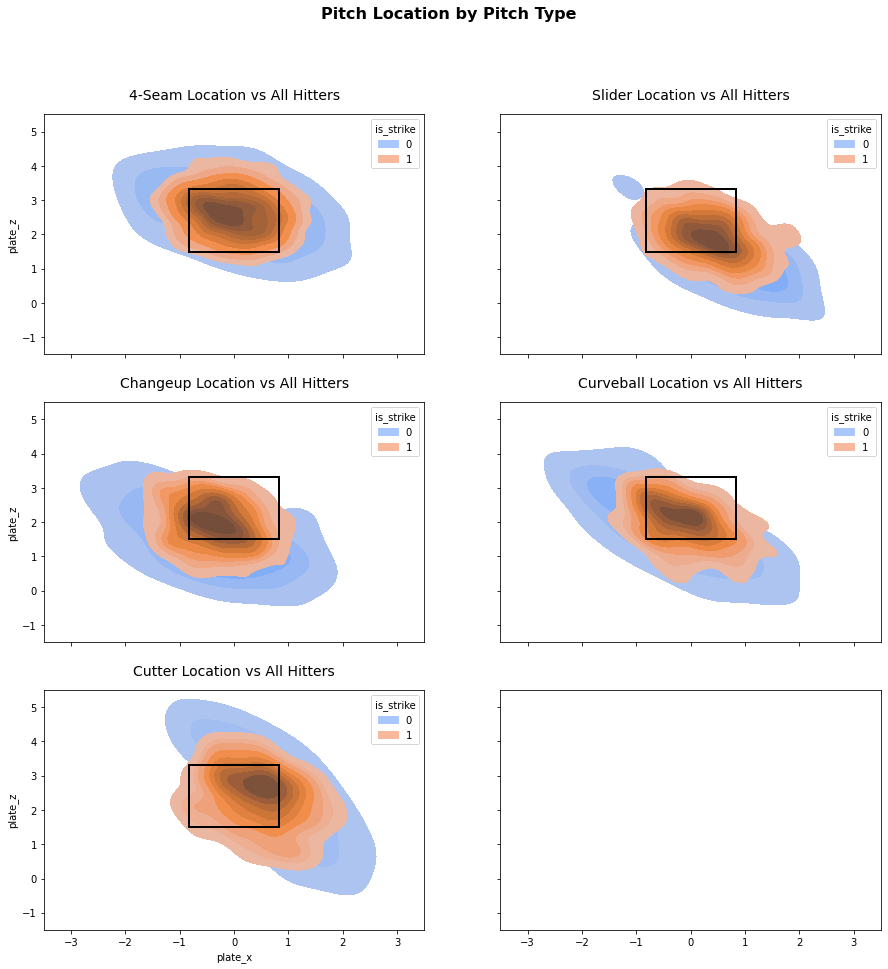

In [20]:
fig, axs = plt.subplots(3, 2, figsize = (15, 15), sharex = True, sharey = True)
fig.suptitle('Pitch Location by Pitch Type', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)

sns.kdeplot(ax = axs[0][0],data=ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('4-Seam Location vs All Hitters', fontsize = 14, pad = 15)

sns.kdeplot(ax = axs[0][1],data=sl,x='plate_x',y='plate_z',fill = True,hue='is_strike',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Slider Location vs All Hitters', fontsize = 14, pad = 15)

sns.kdeplot(ax = axs[1][0],data=ch,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Changeup Location vs All Hitters', fontsize = 14, pad = 15)

sns.kdeplot(ax = axs[1][1],data=cu,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Curveball Location vs All Hitters', fontsize = 14, pad = 15)

sns.kdeplot(ax = axs[2][0],data=fc,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[2][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][0].set_title('Cutter Location vs All Hitters', fontsize = 14, pad = 15);

# Heatmaps

### 4-Seam Heatmaps

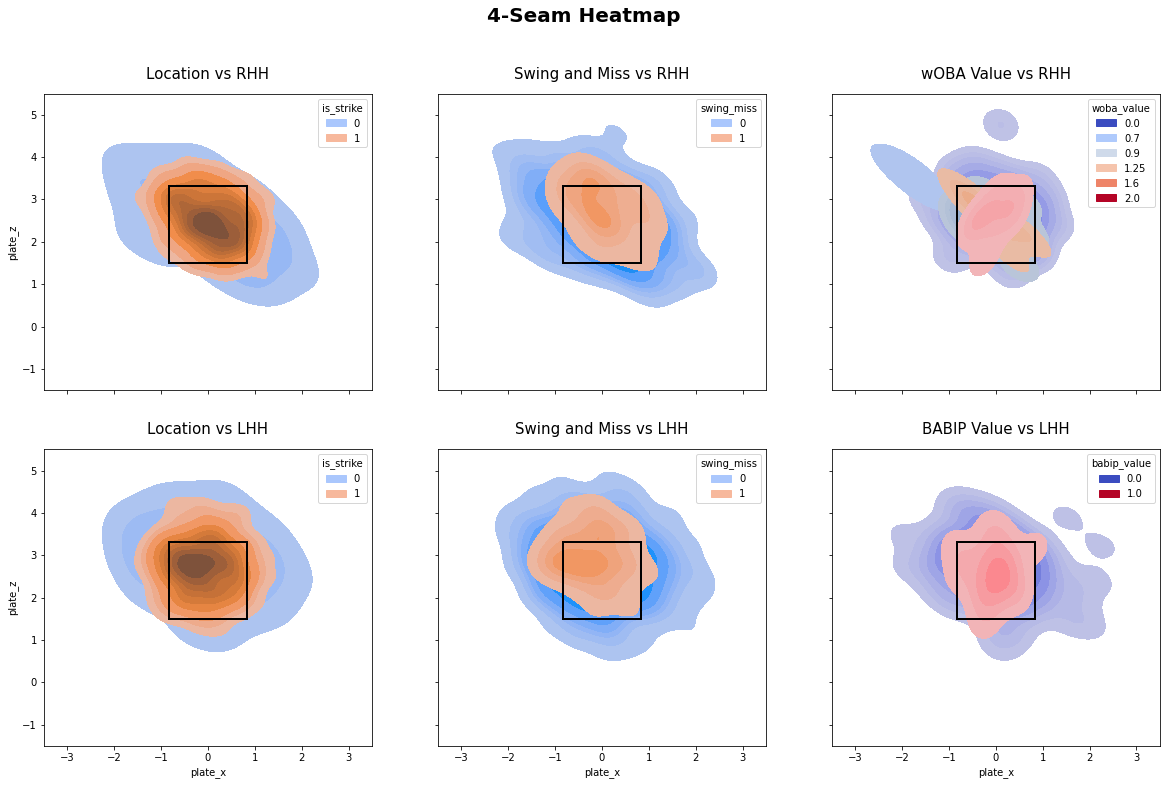

In [21]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('4-Seam Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_ff,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_ff,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_ff,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_ff,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_ff,x='plate_x',y='plate_z',fill=True,hue='babip_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('BABIP Value vs LHH', fontsize = 15, pad = 15);

### Slider Heatmaps

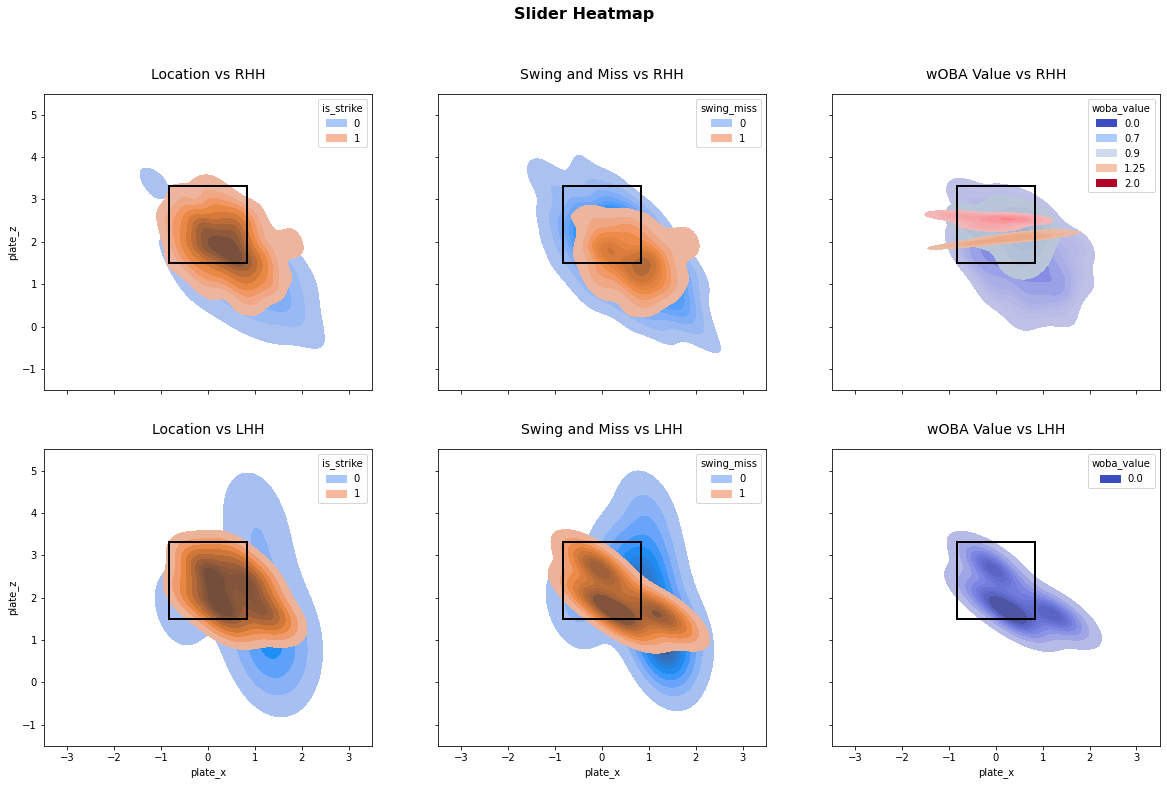

In [22]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slider Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_sl,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_sl,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_sl,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_sl,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_sl,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 14, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_sl,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHH', fontsize = 14, pad = 15);

### Changeup Heatmaps

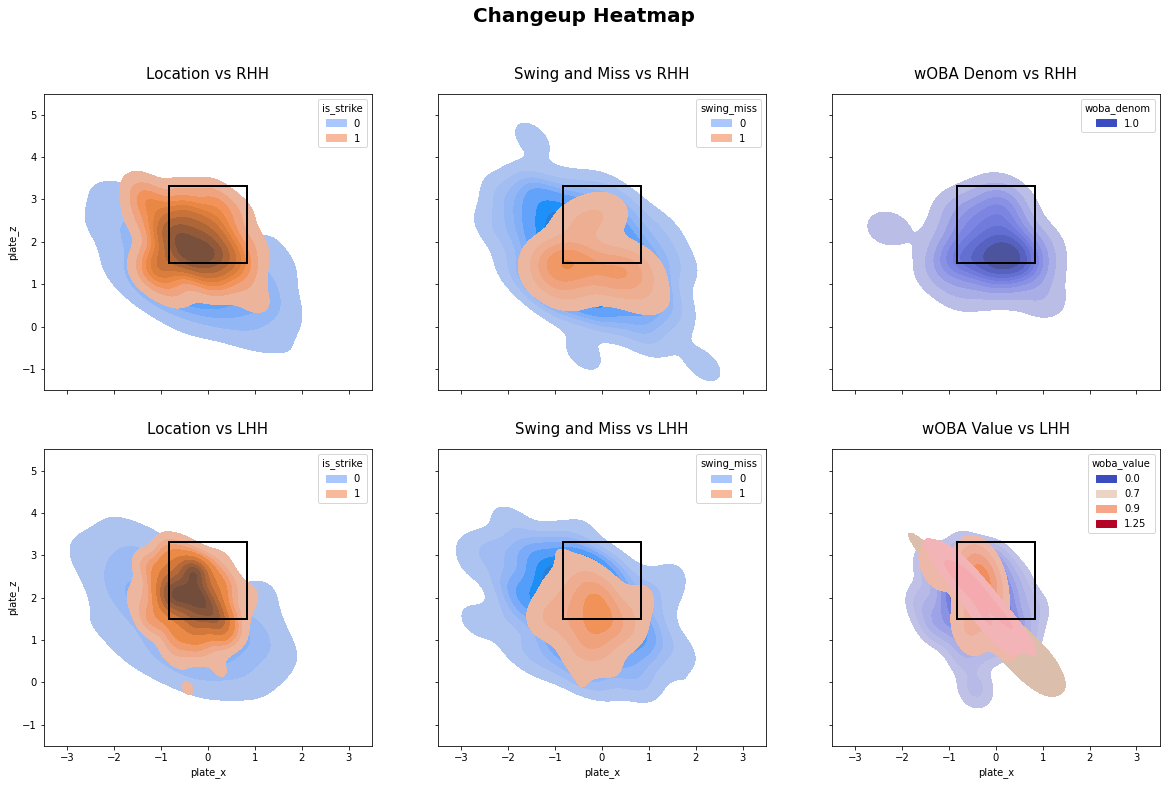

In [23]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Changeup Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_ch,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_ch,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_ch,x='plate_x',y='plate_z',fill=True,hue='woba_denom',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Denom vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_ch,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_ch,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_ch,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHH', fontsize = 15, pad = 15);

### Curveball Heatmaps

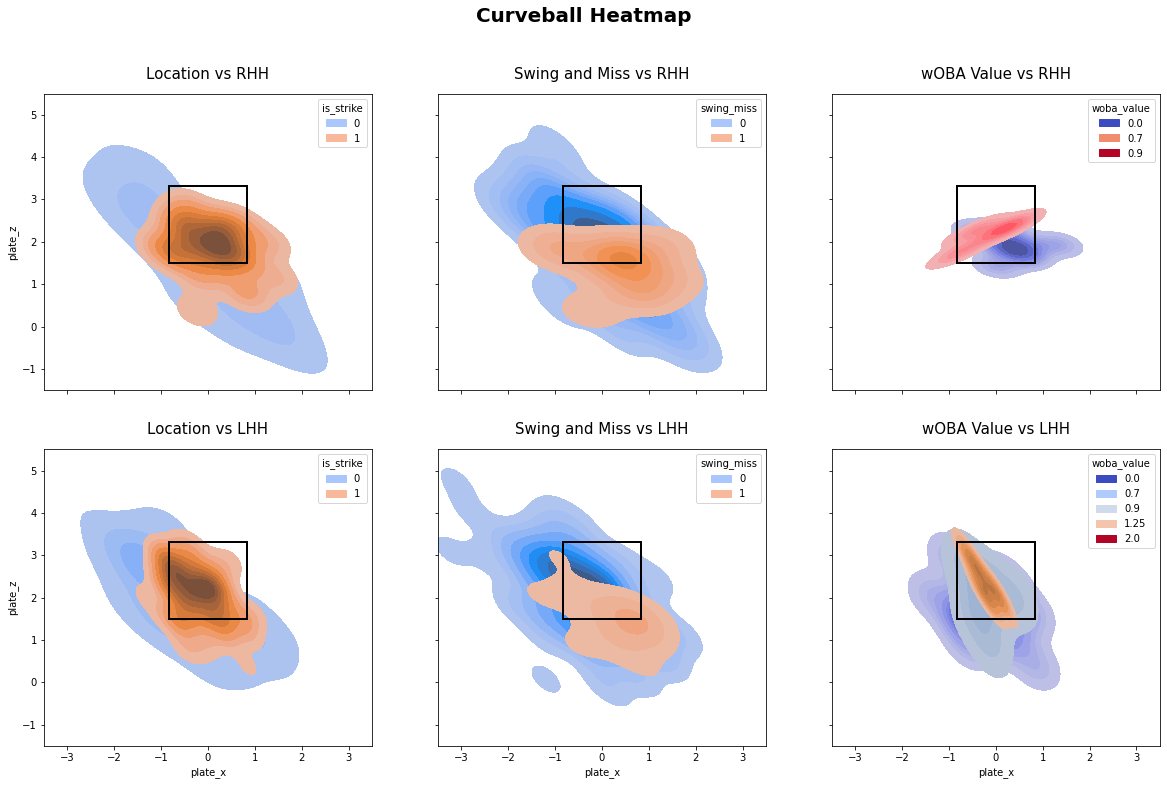

In [24]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Curveball Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_cu,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_cu,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_cu,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_cu,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_cu,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_cu,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHH', fontsize = 15, pad = 15);

### Cutter Heatmaps

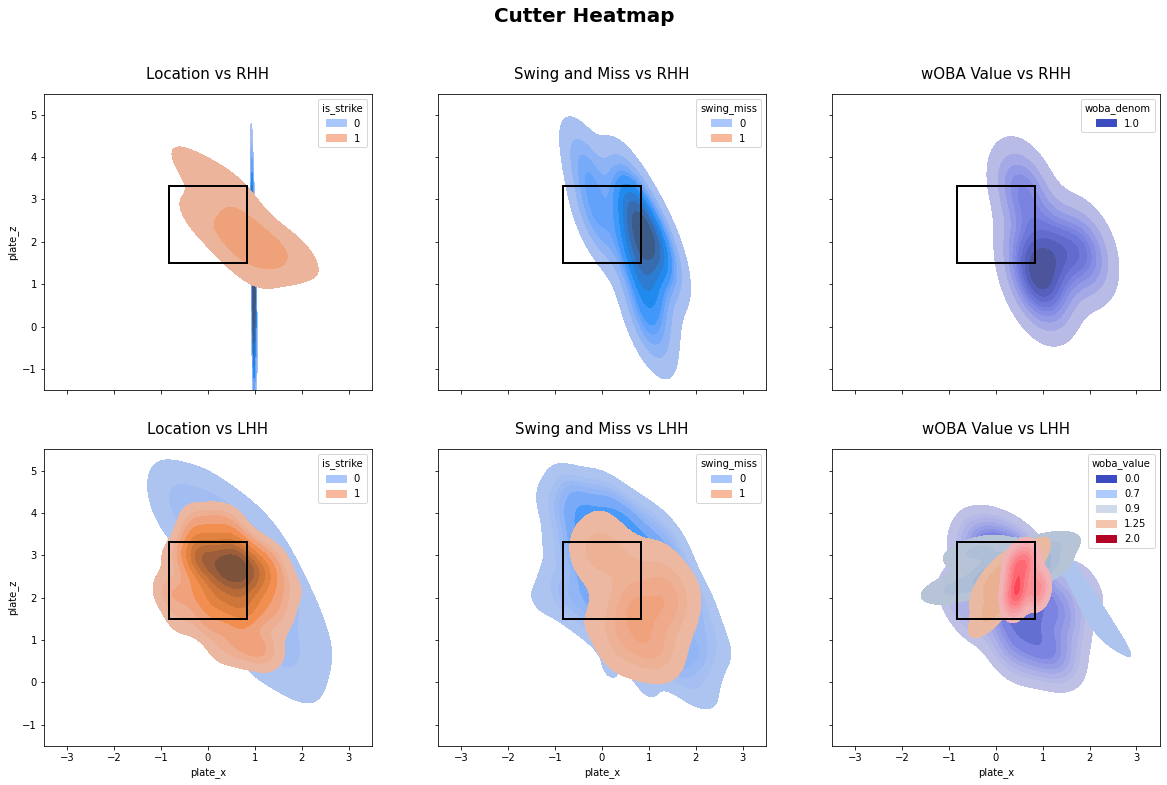

In [25]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Cutter Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -1.5, ymax = 5.5)
sns.kdeplot(ax = axs[0][0],data=r_fc,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][1],data=r_fc,x='plate_x',y='plate_z',fill = True,hue='swing_miss',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[0][2],data=r_fc,x='plate_x',y='plate_z',fill=True,hue='woba_denom',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][0],data=l_fc,x='plate_x',y='plate_z',fill=True,hue='is_strike',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][1],data=l_fc,x='plate_x',y ='plate_z',fill=True,hue='swing_miss',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHH', fontsize = 15, pad = 15)
sns.kdeplot(ax = axs[1][2],data=l_fc,x='plate_x',y='plate_z',fill=True,hue='woba_value',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHH', fontsize = 15, pad = 15);